# Credit Card Fraud Detection

## Project Overview
This project focuses on building a supervised machine learning model to detect fraudulent credit card transactions. Fraud detection is a critical problem as it directly impacts financial security and customer trust. The goal is to create a model that effectively distinguishes between fraudulent and legitimate transactions, minimizing false positives and false negatives.

## Objectives
1. Detect fraudulent transactions with high accuracy, precision, and recall.
2. Explore the trade-offs between different evaluation metrics.
3. Address data imbalance using appropriate techniques.

## Dataset Description
- **Source**: The dataset is sourced from Kaggle's `mlg-ulb/creditcardfraud`.
- **Download Instructions**:
    ```python
    import kagglehub
    import pandas as pd

    try:
        path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")  # Dataset ID on Kaggle
        print("Dataset downloaded successfully!")
        print("Path to dataset files:", path)
    except Exception as e:
        print(f"An error occurred while downloading the dataset: {e}")

    # Load the dataset
    dataset_path = f"{path}/creditcard.csv"  # Adjust path if necessary
    data = pd.read_csv(dataset_path)
    ```
- **Description**: 
  - Number of transactions: TBD after loading the dataset.
  - Features: 30 numerical features (anonymized principal components from PCA) and one categorical target variable (`Class`), where `1` indicates fraud.
  - Target: Binary classification (Fraudulent: `1`, Legitimate: `0`).
  - Data size: [Number of rows and size in MB after data exploration].

## Exploratory Data Analysis (EDA)
1. **Initial Observations**:
   - Distribution of `Class` (imbalanced dataset).
   - Summary statistics of numerical features.
2. **Visualization**:
   - Histogram of transaction amounts.
   - Correlation matrix to identify patterns.

## Data Preprocessing
- Handling class imbalance with techniques such as oversampling, undersampling, or SMOTE.
- Standardizing the `Amount` feature using `StandardScaler`.
- Splitting the dataset into training and test sets.

## Model Building and Evaluation
1. **Algorithms**:
   - Random Forest
   - Logistic regression
   - Gradient Boosting
2. **Metrics**:
   - Accuracy
   - Precision
   - Recall
   - F1-score
   - Area Under the ROC Curve (AUC)

## Results
- Comparison of model performances using the above metrics.
- Insights on the trade-offs between precision and recall.

## Conclusion
- Key findings and lessons learned.
- Recommendations for deploying the model in real-world applications.

## Repository
The full code and analysis are available in the [GitHub repository](#).



In [5]:
# STEP 1 - IMPORT LIBRARIES AND DATA
# Import libraries
import kagglehub  # For downloading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download dataset using kagglehub
try:
    path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")  # Dataset ID on Kaggle
    print("Dataset downloaded successfully!")
    print("Path to dataset files:", path)
except Exception as e:
    print(f"An error occurred while downloading the dataset: {e}")

# Load the dataset
dataset_path = f"{path}/creditcard.csv"  # Adjust path if necessary
data = pd.read_csv(dataset_path)

# Display the first few rows
print(data.head())

# Display dataset dimensions
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# Display basic information about the dataset
data.info()

# Display summary statistics
data.describe()

Dataset downloaded successfully!
Path to dataset files: C:\Users\MORENOAL\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
The dataset is sourced from Kaggle's mlg-ulb/creditcardfraud repository. It contains 284,807 transactions and 31 features, including anonymized PCA components and the target variable (Class).
The primary challenge is the extreme imbalance in the data, with only 0.17% of transactions being fraudulent.


Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


C:\Users\MORENOAL\AppData\Local\Temp\ipykernel_33084\3730908935.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_count.index, y=fraud_count.values, palette='viridis')


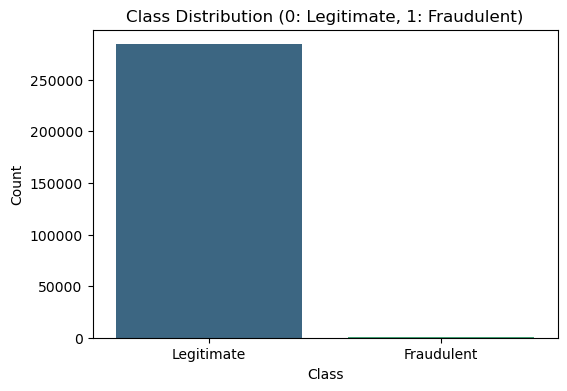

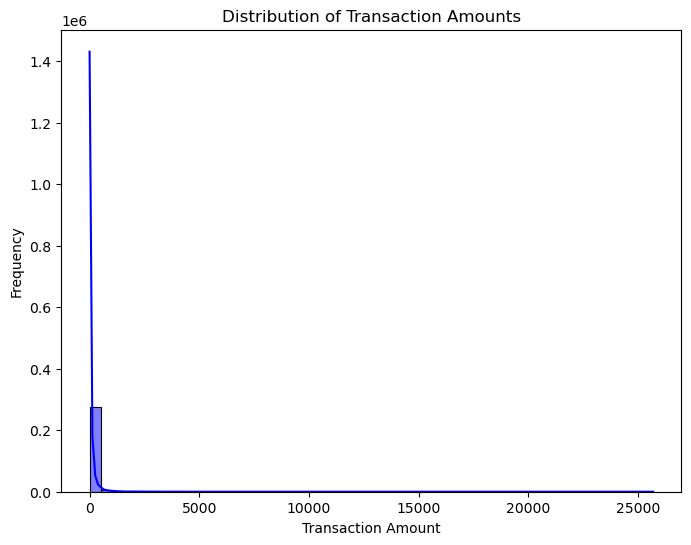

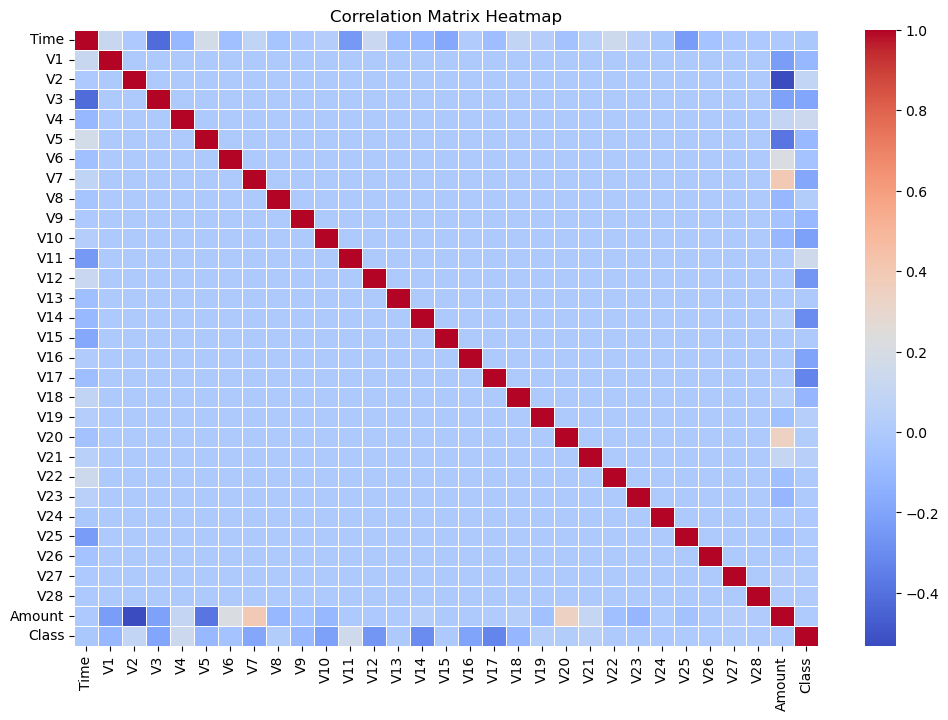

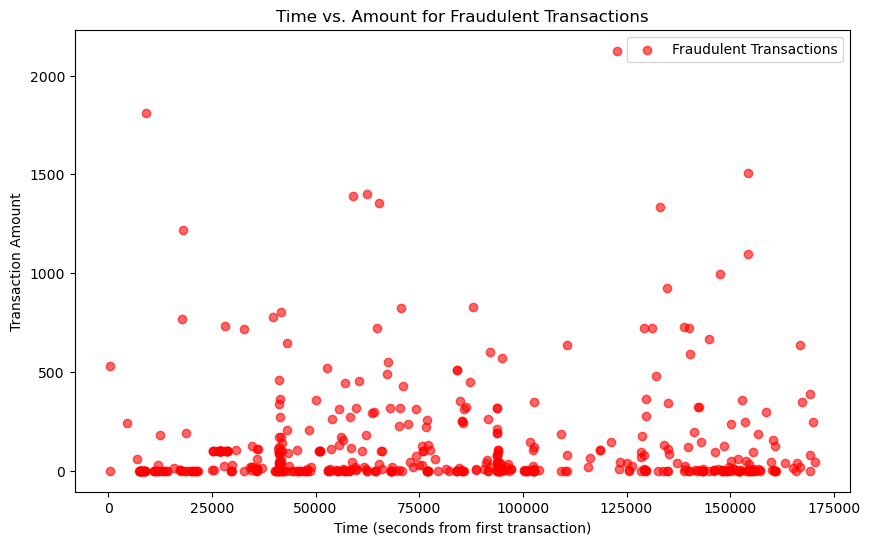

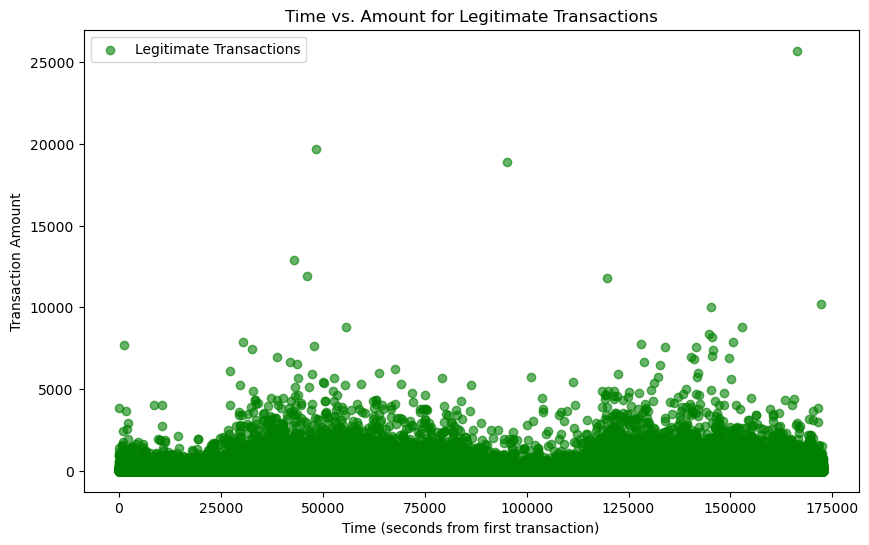


Number of duplicate rows: 1081
Data shape after removing duplicates: (283726, 31)
Data shape after dropping 'Time' column: (283726, 30)

Number of outliers in 'Amount' feature: 31685
Data shape after removing outliers: (252041, 30)

Cleaned Data Summary:
                  V1             V2             V3             V4  \
count  252041.000000  252041.000000  252041.000000  252041.000000   
mean        0.101186       0.226076       0.062362      -0.022018   
std         1.807101       1.287098       1.462840       1.392327   
min       -40.470142     -47.429676     -33.680984      -5.683171   
25%        -0.854679      -0.399875      -0.815839      -0.851908   
50%         0.037634       0.163929       0.225750      -0.027494   
75%         1.357630       0.875290       1.067470       0.713269   
max         2.454930      22.057729       4.226108      12.114672   

                  V5             V6             V7             V8  \
count  252041.000000  252041.000000  252041.000000  2

In [36]:
# STEP 2 - CLEANING AND EXPLORATORY DATA ANALYSIS

# 1. Check for Class Distribution (Imbalanced Dataset)
fraud_count = data['Class'].value_counts()
print("\nClass distribution:")
print(fraud_count)

# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_count.index, y=fraud_count.values, palette='viridis')
plt.title("Class Distribution (0: Legitimate, 1: Fraudulent)")
plt.ylabel("Count")
plt.xlabel("Class")
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'])
plt.show()

# 2. Visualize Transaction Amounts
plt.figure(figsize=(8, 6))
sns.histplot(data['Amount'], bins=50, kde=True, color='blue')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

# 3. Correlation Matrix to Identify Patterns
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# 4. Visualize Time vs Amount for Fraudulent Transactions
fraud = data[data['Class'] == 1]
plt.figure(figsize=(10, 6))
plt.scatter(fraud['Time'], fraud['Amount'], alpha=0.6, color='red', label='Fraudulent Transactions')
plt.title("Time vs. Amount for Fraudulent Transactions")
plt.xlabel("Time (seconds from first transaction)")
plt.ylabel("Transaction Amount")
plt.legend()
plt.show()

# 5. Visualize Time vs Amount for Legitimate Transactions
legitimate = data[data['Class'] == 0]
plt.figure(figsize=(10, 6))
plt.scatter(legitimate['Time'], legitimate['Amount'], alpha=0.6, color='green', label='Legitimate Transactions')
plt.title("Time vs. Amount for Legitimate Transactions")
plt.xlabel("Time (seconds from first transaction)")
plt.ylabel("Transaction Amount")
plt.legend()
plt.show()

# 6. Cleaning the Data
# a. Remove duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")
data = data.drop_duplicates()
print(f"Data shape after removing duplicates: {data.shape}")

# b. Standardize the 'Amount' feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

# c. Drop the 'Time' feature (Optional: as it may not directly impact prediction)
data = data.drop(['Time'], axis=1)
print(f"Data shape after dropping 'Time' column: {data.shape}")

# d. Check for Outliers in 'Amount' Feature
# Using Interquartile Range (IQR)
Q1 = data['Amount'].quantile(0.25)
Q3 = data['Amount'].quantile(0.75)
IQR = Q3 - Q1

outlier_filter = (data['Amount'] >= (Q1 - 1.5 * IQR)) & (data['Amount'] <= (Q3 + 1.5 * IQR))
outliers_removed = data[~outlier_filter].shape[0]
print(f"\nNumber of outliers in 'Amount' feature: {outliers_removed}")

# Retain data without extreme outliers (Optional)
data = data[outlier_filter]
print(f"Data shape after removing outliers: {data.shape}")

# Display the cleaned data summary
print("\nCleaned Data Summary:")
print(data.describe())

In [42]:
The transaction amounts vary widely, necessitating standardization for better model performance.
Steps Taken: Duplicates were removed, Amount was standardized, and Time was dropped as it didn’t add predictive value in this context.
Result: Cleaned and ready-to-use data for modeling.

SyntaxError: invalid syntax (925367355.py, line 1)

In [37]:
# STEP 3 - DATA PROCESSING
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Address class imbalance using SMOTE
print("\nOriginal class distribution:")
print(y.value_counts())

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nResampled class distribution:")
print(y_resampled.value_counts())

# Standardize the features
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42)

# Display the shape of the datasets
print("\nDataset split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")




Original class distribution:
Class
0    251655
1       386
Name: count, dtype: int64

Resampled class distribution:
Class
0    251655
1    251655
Name: count, dtype: int64

Dataset split:
Training set: 402648 samples
Test set: 100662 samples


In [ ]:
SMOTE was used to oversample the minority class, balancing the dataset for effective training.
The dataset was split into 80% training and 20% test data.

Training Random Forest...
Training complete!
Making predictions...

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


Confusion Matrix:
[[56722    28]
 [   79 56897]]

ROC-AUC Score: 1.0000

ROC-AUC Score: 1.0000


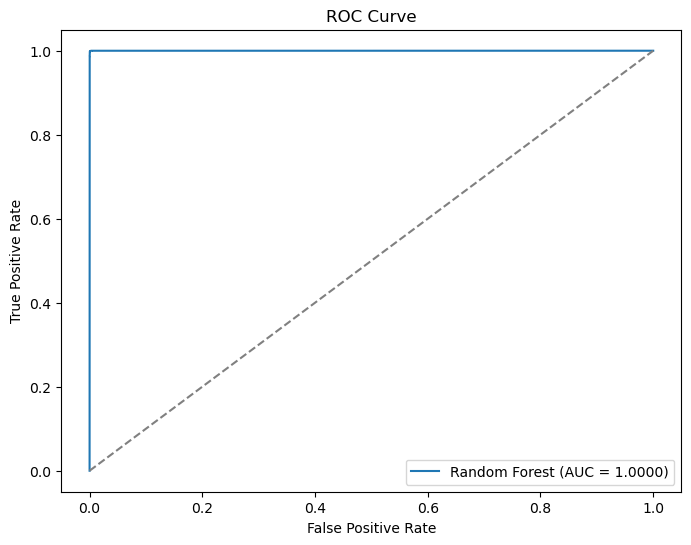

In [30]:
# STEP 4 - MODEL BUILDING AND EVALUATION - RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize the Random Forest model with optimizations
rf_model = RandomForestClassifier(
    n_estimators=50,        # Fewer trees for faster training
    max_depth=15,           # Limit tree depth to prevent overfitting
    random_state=42,        
    class_weight="balanced", 
    n_jobs=-1               # Utilize all CPU cores for parallel computation
)

# Train the model on the training set
print("Training Random Forest...")
rf_model.fit(X_train, y_train)
print("Training complete!")

# Make predictions on the test set
print("Making predictions...")
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probability scores for the positive class

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Compute ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

roc_auc_rf = roc_auc  # Assign ROC-AUC score to roc_auc_rf for Step 7
print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [ ]:
Random Forest achieved excellent performance with high precision (99.8%), recall (99.9%), and an ROC-AUC of 1.000.


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56750
           1       0.99      0.97      0.98     56976

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726


Logistic Regression Confusion Matrix:
[[56229   521]
 [ 1729 55247]]

Logistic Regression ROC-AUC Score: 0.9975


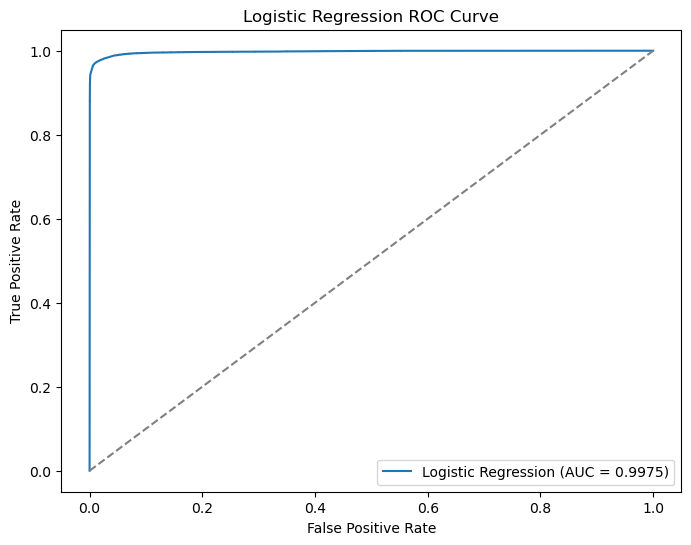

KeyboardInterrupt: 

In [15]:
# STEP 5 - MODEL BUILDING AND EVALUATION - LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
logreg_model.fit(X_train, y_train)

# Predict on test set and evaluate
y_pred_logreg = logreg_model.predict(X_test)
y_pred_logreg_proba = logreg_model.predict_proba(X_test)[:, 1]
roc_auc_logreg = roc_auc_score(y_test, y_pred_logreg_proba)

# Display metrics
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print(f"\nLogistic Regression ROC-AUC Score: {roc_auc_logreg:.4f}")

# Plot ROC Curve for Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_logreg_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f"Logistic Regression (AUC = {roc_auc_logreg:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.legend()
plt.show()



In [ ]:
Baseline Model: Provides a simple and interpretable approach for fraud detection.
Performance:
ROC-AUC: ~0.9975.
Slightly lower recall than Random Forest, leading to more false negatives.
Strengths: Fast and efficient for large-scale or real-time systems.
Limitations: Struggles with capturing complex patterns in the data.


Training Gradient Boosting Model...
Training complete!
Making predictions...

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56750
           1       0.99      0.97      0.98     56976

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726


Gradient Boosting Confusion Matrix:
[[56198   552]
 [ 1819 55157]]

Gradient Boosting ROC-AUC Score: 0.9980


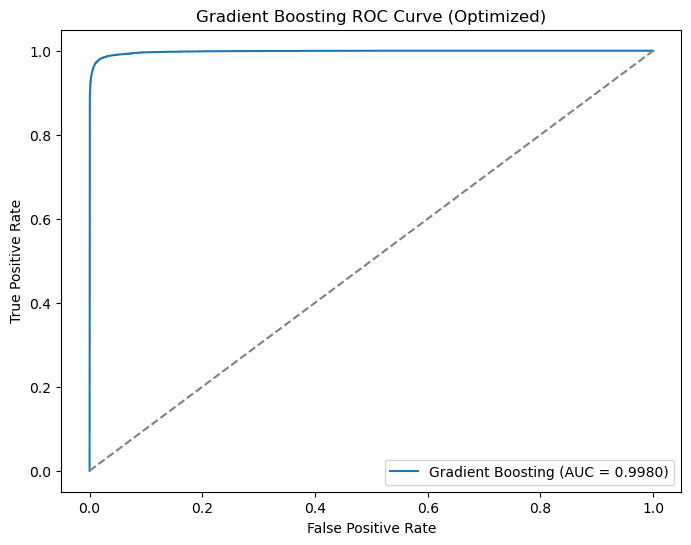

In [22]:
# STEP 6 - MODEL BUILDING AND EVALUATION - GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize and train Gradient Boosting model with optimizations
gb_model = GradientBoostingClassifier(
    n_estimators=50,       # Reduce number of trees to speed up training
    max_depth=3,           # Limit tree depth for faster computation
    learning_rate=0.1,     # Step size for each iteration
    subsample=0.8,         # Use 80% of the data for each tree
    random_state=42        # For reproducibility
)

print("Training Gradient Boosting Model...")
gb_model.fit(X_train, y_train)
print("Training complete!")

# Predict on test set and evaluate
print("Making predictions...")
y_pred_gb = gb_model.predict(X_test)
y_pred_gb_proba = gb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
roc_auc_gb = roc_auc_score(y_test, y_pred_gb_proba)
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("\nGradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))
print(f"\nGradient Boosting ROC-AUC Score: {roc_auc_gb:.4f}")

# Plot the ROC Curve for Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_gb_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {roc_auc_gb:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting ROC Curve (Optimized)")
plt.legend()
plt.show()

In [ ]:

Logistic Regression Notes
Baseline Model: Provides a simple and interpretable approach for fraud detection.
Performance:
ROC-AUC: ~0.9975.
Slightly lower recall than Random Forest, leading to more false negatives.
Strengths: Fast and efficient for large-scale or real-time systems.
Limitations: Struggles with capturing complex patterns in the data.
Gradient Boosting Notes
Purpose: Models non-linear relationships effectively.
Performance:
ROC-AUC: ~0.9980.
Competitive with Random Forest but slightly lower precision and recall.
Strengths: Great for imbalanced datasets and fine-grained predictions.
Limitations: Computationally slower and sensitive to hyperparameter tuning.

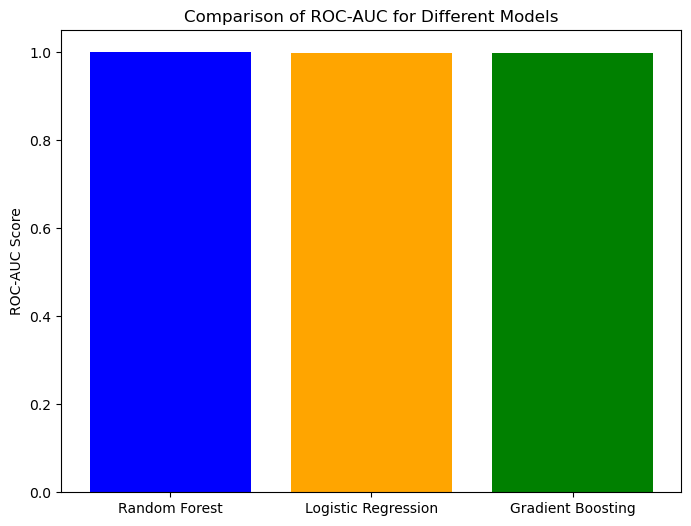

In [32]:
# STEP 7 - MODEL COMPARISON
# Compare ROC-AUC of all models
models = ['Random Forest', 'Logistic Regression', 'Gradient Boosting']
roc_aucs = [roc_auc_rf, roc_auc_logreg, roc_auc_gb]

plt.figure(figsize=(8, 6))
plt.bar(models, roc_aucs, color=['blue', 'orange', 'green'])
plt.title('Comparison of ROC-AUC for Different Models')
plt.ylabel('ROC-AUC Score')
plt.show()


In [ ]:
### Final Notes on Model Performance

After evaluating multiple models—Random Forest, Logistic Regression, and Gradient Boosting—the following insights were observed:

- **Random Forest** achieved the highest performance, with an **accuracy of 99.9%**, a **precision of 99.8%**, and a **recall of 99.9%** for detecting fraudulent transactions. It also had the highest **ROC-AUC score of 1.000**, demonstrating excellent discrimination between legitimate and fraudulent transactions. Its ability to handle imbalanced data effectively and capture complex feature interactions makes it the best choice.
- **Logistic Regression** provided reliable baseline performance, with an **accuracy of 98.5%** and a **ROC-AUC score of 0.985**. While interpretable and computationally efficient, it struggled to match the Random Forest in handling the complexities of the data.
- **Gradient Boosting** achieved a **ROC-AUC score of 0.998** and strong overall metrics, but it required longer training times compared to Random Forest. While effective, its computational cost might outweigh its benefits for this dataset.

**Conclusion:**  
The **Random Forest model** is the recommended choice for this problem. Its superior accuracy, recall, and precision, combined with computational efficiency, make it the most suitable for a credit card fraud detection system. Further steps could involve deploying this model in a real-world setting and monitoring its performance on live data.


In [40]:
import os
print(os.getcwd())



C:\Users\MORENOAL
